# Example 3: Multiple WEC-Farm with load curve
This notebook demonstrates applying Multiple WEC-Farm configurations:
- Setting up a grid system with 3 WEC farms
- Reviewing Load curve
- Running time-domain simulations
- Analyzing WEC performance and grid impact

This example uses the IEEE 39 case system with wave energy converters and load curve.

In [1]:
import wecgrid

example3 = wecgrid.Engine("../../examples/WECGrid.db")
example3.case("../../examples/grid_models/IEEE_39_bus.raw")
example3.load(["pypsa"])



     __     __     ______     ______     ______     ______     __     _____
    /\ \  _ \ \   /\  ___\   /\  ___\   /\  ___\   /\  == \   /\ \   /\  __-.
    \ \ \/ ".\ \  \ \  __\   \ \ \____  \ \ \__ \  \ \  __<   \ \ \  \ \ \/\ \
     \ \__/".~\_\  \ \_____\  \ \_____\  \ \_____\  \ \_\ \_\  \ \_\  \ \____-
      \/_/   \/_/   \/_____/   \/_____/   \/_____/   \/_/ /_/   \/_/   \/____/
                


## Apply the WEC-Farms

Lets create 3 WEC Farm. Two of the Farms will have 10 RM3 devices each, while the fourth will have 10 LUPA devices. The LUPA simulation data was pulled from the pre-loaded WEC-Grid database found here. Specifics about the LUPA run can be found in the documentation.

In [2]:
#Information about the wec-sim runs in database can accessed using 
example3.database.wecsim_runs()

,wec_sim_id,model_type,sim_duration_sec,delta_time,wave_height_m,wave_period_sec,wave_spectrum,wave_class,wave_seed,simulation_hash,created_at
0,2,LUPA,86400.0,0.1,2.5,8.0,PM,irregular,8,LUPA_2.5m_8.0s_8,2025-08-19 19:59:49
1,1,RM3,86400.0,0.1,2.5,8.0,PM,irregular,94,RM3_2.5m_8.0s_94,2025-08-19 19:45:01


In [3]:
###### RM3 Farm 
example3.apply_wec(
   farm_name = "RM3-FARM",
   size = 10, 
   wec_sim_id = 1,
   bus_location=40, # create a new bus for farm  
   connecting_bus = 39, 
)

###### RM3 Farm 2
example3.apply_wec(
   farm_name = "RM3-FARM2",
   size = 10, 
   wec_sim_id = 1,
   bus_location=41, # create a new bus for farm  
   connecting_bus = 25, 
)


###### LUPA Farm 
example3.apply_wec(
   farm_name = "LUPA-FARM",
   size = 10, 
   wec_sim_id = 2, # LUPA
   bus_location=42, # create a new bus for farm  
   connecting_bus = 29, # Connect to bus 1 or swing bus
)


WEC Farm added: RM3-FARM
WEC Farm added: RM3-FARM2
WEC Farm added: LUPA-FARM


## Review WEC-Farm / WEC-Device Data


In [4]:
# Farm Data
WECFarms = example3.wec_farms # list 

RM3_Farm_1 = WECFarms[0]
LUPA_Farm_1 = WECFarms[1]
print(RM3_Farm_1)
print(LUPA_Farm_1)

WECFarm:
        ├─ name: 'RM3-FARM'
        ├─ size: 10
        ├─ model: 'RM3'
        ├─ bus_location: 40
        ├─ connecting_bus: 39
        └─ sim_id: 1

        Base: 100.0 MVA

    
WECFarm:
        ├─ name: 'RM3-FARM2'
        ├─ size: 10
        ├─ model: 'RM3'
        ├─ bus_location: 41
        ├─ connecting_bus: 25
        └─ sim_id: 1

        Base: 100.0 MVA

    


WECDevice:
    ├─ name: 'RM3_1_0'
    ├─ model: 'RM3'
    ├─ bus_location: 40
    ├─ sim_id: 1
    └─ rows: 288
    
                      time         p    q       eta
snapshots                                          
2025-08-25 00:00:00    300  0.000135  0.0 -0.003430
2025-08-25 00:05:00    600  0.000135  0.0 -0.003430
2025-08-25 00:10:00    900  0.000197  0.0  0.002427
2025-08-25 00:15:00   1200  0.000192  0.0  0.001373
2025-08-25 00:20:00   1500  0.000151  0.0  0.000987
...                    ...       ...  ...       ...
2025-08-25 23:35:00  85200  0.000160  0.0 -0.008499
2025-08-25 23:40:00  85500  0.000175  0.0  0.009618
2025-08-25 23:45:00  85800  0.000152  0.0 -0.007640
2025-08-25 23:50:00  86100  0.000219  0.0  0.002881
2025-08-25 23:55:00  86400  0.000135  0.0 -0.000120

[288 rows x 4 columns]


<AxesSubplot:title={'center':'Wave Elevation - RM3'}, xlabel='time(s)', ylabel='meters'>

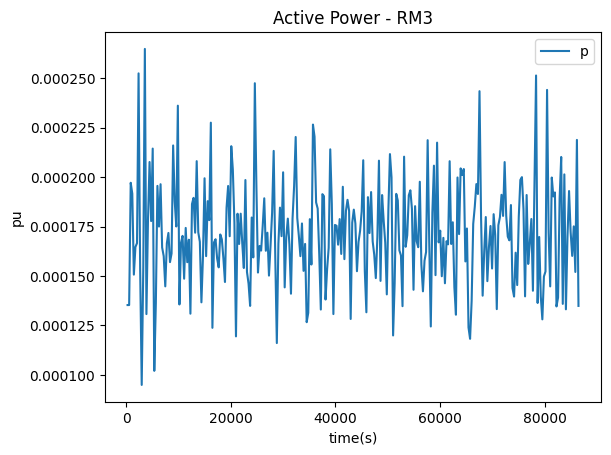

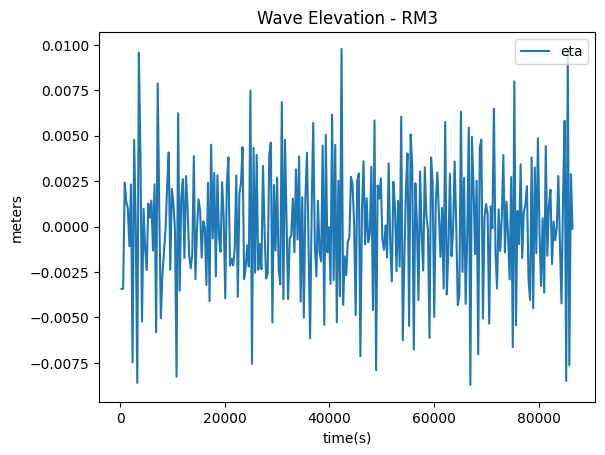

In [5]:
# WEC Device Data (RM3)
RM3_WEC = RM3_Farm_1.wec_devices[0]
print(RM3_WEC)
print(RM3_WEC.dataframe)

RM3_WEC.dataframe.plot("time", "p", title= "Active Power - RM3",ylabel='pu', xlabel='time(s)')
RM3_WEC.dataframe.plot("time", "eta", title= "Wave Elevation - RM3", ylabel='meters',xlabel='time(s)')

WECDevice:
    ├─ name: 'RM3_1_0'
    ├─ model: 'RM3'
    ├─ bus_location: 41
    ├─ sim_id: 1
    └─ rows: 288
    
                      time         p    q       eta
snapshots                                          
2025-08-25 00:00:00    300  0.000135  0.0 -0.003430
2025-08-25 00:05:00    600  0.000135  0.0 -0.003430
2025-08-25 00:10:00    900  0.000197  0.0  0.002427
2025-08-25 00:15:00   1200  0.000192  0.0  0.001373
2025-08-25 00:20:00   1500  0.000151  0.0  0.000987
...                    ...       ...  ...       ...
2025-08-25 23:35:00  85200  0.000160  0.0 -0.008499
2025-08-25 23:40:00  85500  0.000175  0.0  0.009618
2025-08-25 23:45:00  85800  0.000152  0.0 -0.007640
2025-08-25 23:50:00  86100  0.000219  0.0  0.002881
2025-08-25 23:55:00  86400  0.000135  0.0 -0.000120

[288 rows x 4 columns]


<AxesSubplot:title={'center':'Wave Elevation'}, xlabel='time(s)', ylabel='meters'>

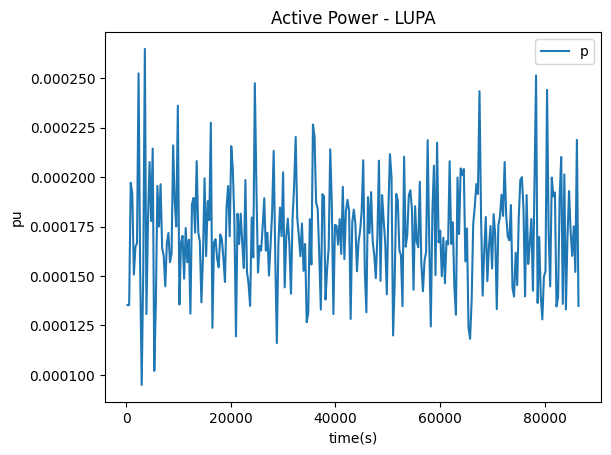

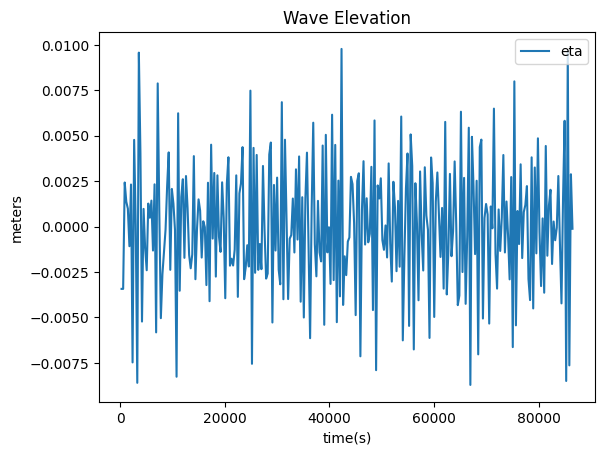

In [6]:
# WEC Device Data (RM3)
LUPA_WEC = LUPA_Farm_1.wec_devices[0]
print(LUPA_WEC)
print(LUPA_WEC.dataframe)

LUPA_WEC.dataframe.plot("time", "p", title= "Active Power - LUPA",ylabel='pu', xlabel='time(s)')
LUPA_WEC.dataframe.plot("time", "eta", title= "Wave Elevation", ylabel='meters',xlabel='time(s)')

## Review Grid data

GridState:
├─ Components:
│   ├─ bus:   42 components
│   ├─ gen:   13 components
│   ├─ line:  37 components
│   └─ load:  31 components
├─ Case: IEEE 39 bus
└─ Modeler: pypsa
    bus bus_name   type         p         q     v_mag  angle_deg  vbase
0     1    Bus_1     PQ  0.000000  0.000000  1.025770  -9.088077    1.0
1     2    Bus_2     PQ  0.000000  0.000000  1.022972  -6.295989    1.0
2     3    Bus_3     PQ -3.220000 -0.024000  0.991600  -9.263537    1.0
3     4    Bus_4     PQ -5.000000 -1.840000  0.959093 -10.190546    1.0
4     5    Bus_5     PQ  0.000000  0.000000  0.958897  -8.962819    1.0
5     6    Bus_6     PQ  0.000000  0.000000  0.961515  -8.209964    1.0
6     7    Bus_7     PQ -2.338000 -0.840000  0.949895 -10.614571    1.0
7     8    Bus_8     PQ -5.220000 -1.760000  0.949161 -11.164753    1.0
8     9    Bus_9     PQ  0.000000  0.000000  0.997089 -10.944311    1.0
9    10   Bus_10     PQ  0.000000  0.000000  0.981352  -5.616054    1.0
10   11   Bus_11     PQ  0.0000

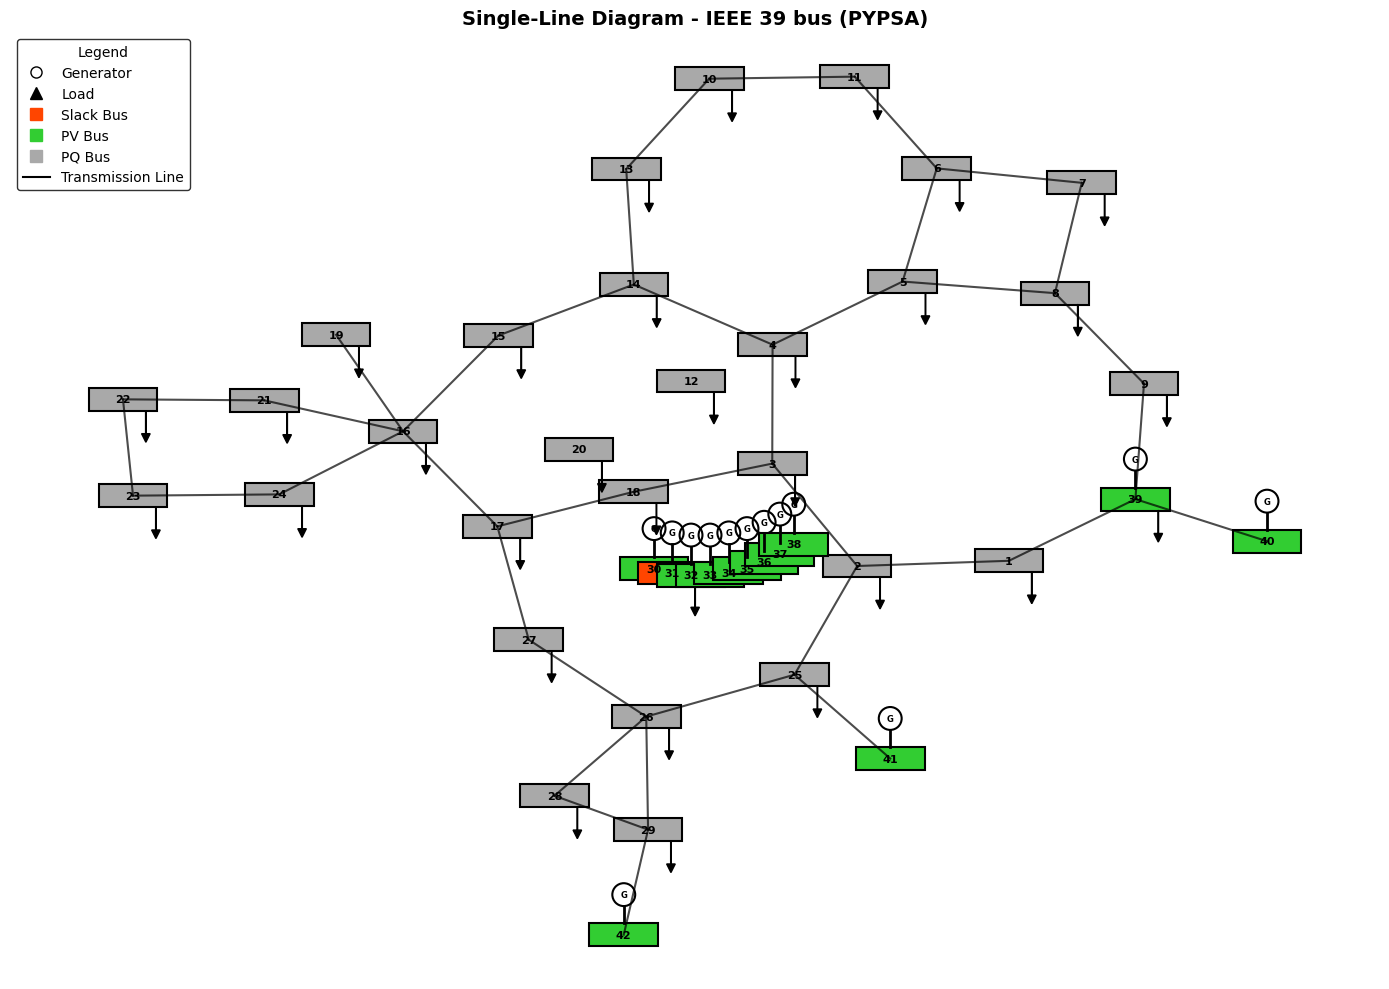

In [7]:
grid = example3.pypsa.grid
print('='*60)
print(grid)
print('='*60)
print(grid.bus)
print('='*60)
print(grid.gen)
print('='*60)
example3.plot.sld() # broken :^(

<AxesSubplot:title={'center':'Load Curves for All Buses'}, xlabel='time', ylabel='pu'>

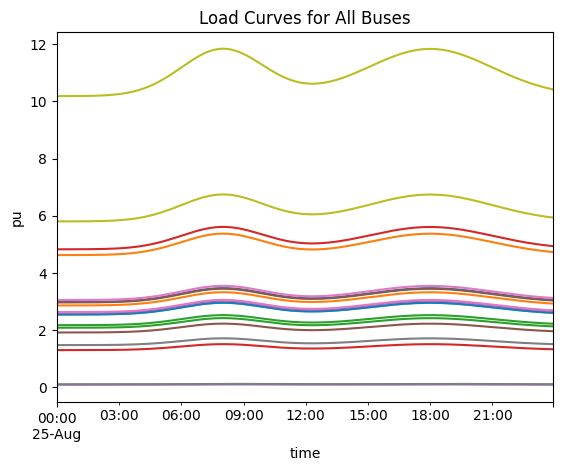

In [8]:
load_curves = example3.generate_load_curves()
load_curves.plot(ylabel='pu', title='Load Curves for All Buses', legend=False)

## Run Time Series Simulation

In [10]:
example3.simulate(load_curve=True) # takes some time!

PyPSA Simulating: 100%|██████████| 288/288 [03:13<00:00,  1.49step/s]

Simulation complete: 193.11s


## Analyze and Visualize Results

Create comprehensive plots to analyze WEC performance and grid impact over time.

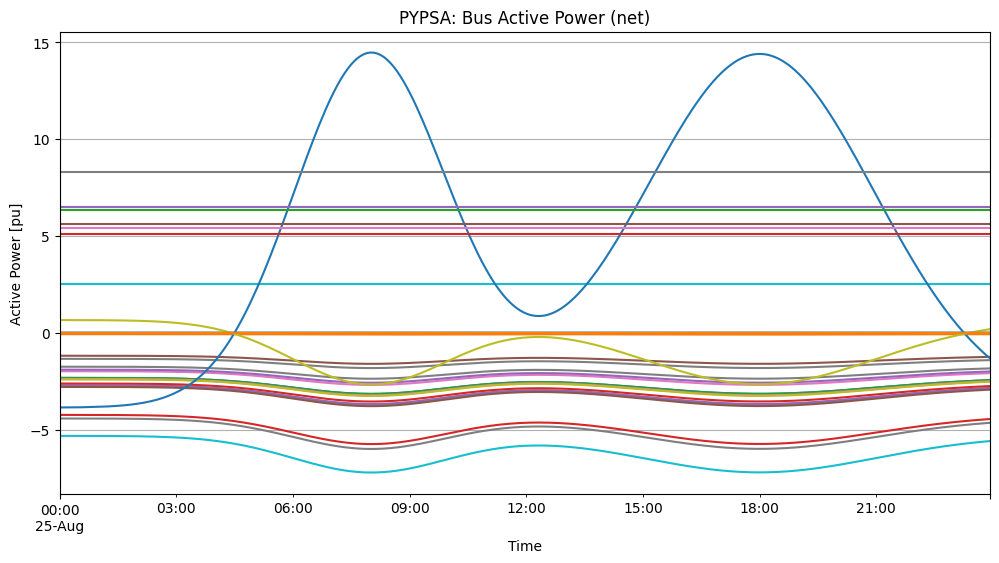

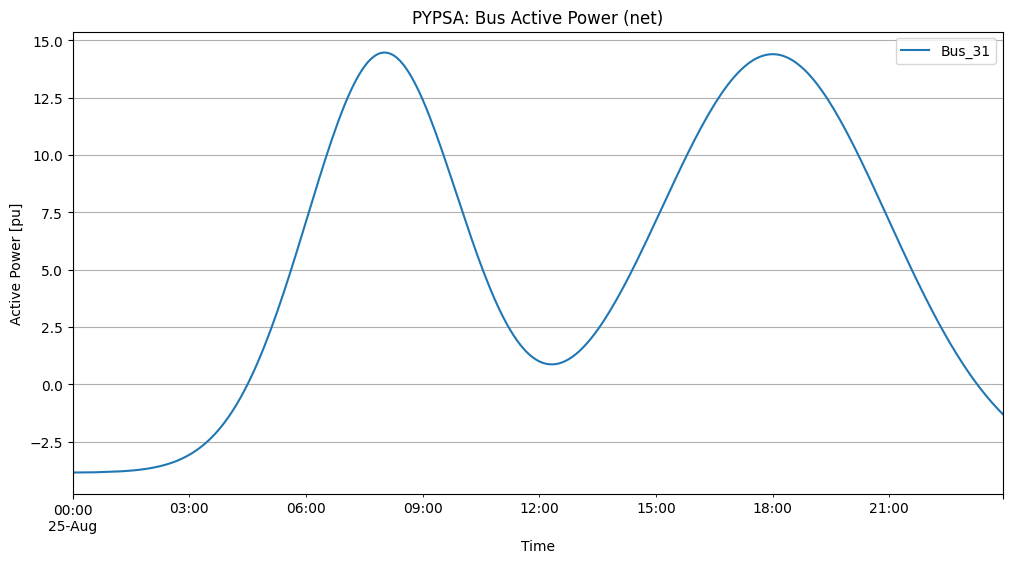

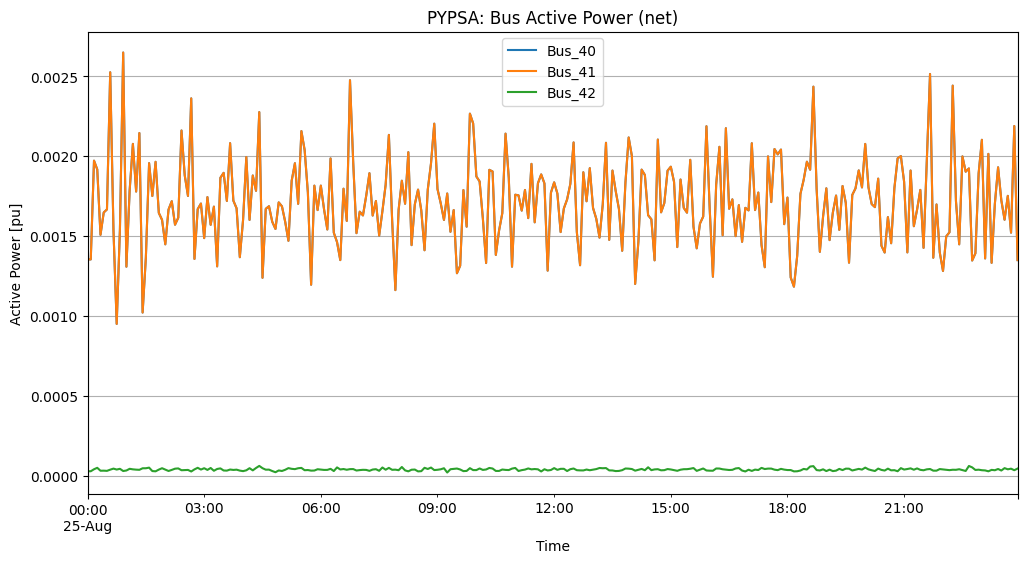

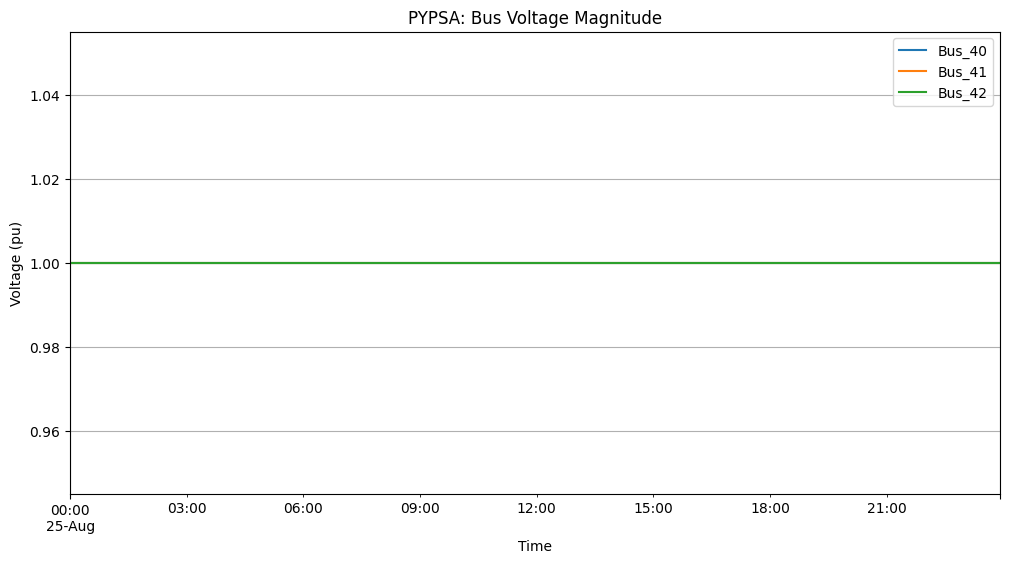

(<Figure size 1200x600 with 1 Axes>,
 <AxesSubplot:title={'center':'PYPSA: Bus Voltage Magnitude'}, xlabel='Time', ylabel='Voltage (pu)'>)

In [11]:
plot = example3.plot
plot.bus()
plot.bus(bus=['Bus_31']) # Swing Bus
plot.bus(bus=['Bus_40', 'Bus_41','Bus_42']) # WEC-Farm Buses
plot.bus(parameter='v_mag',bus=['Bus_40', 'Bus_41','Bus_42'])

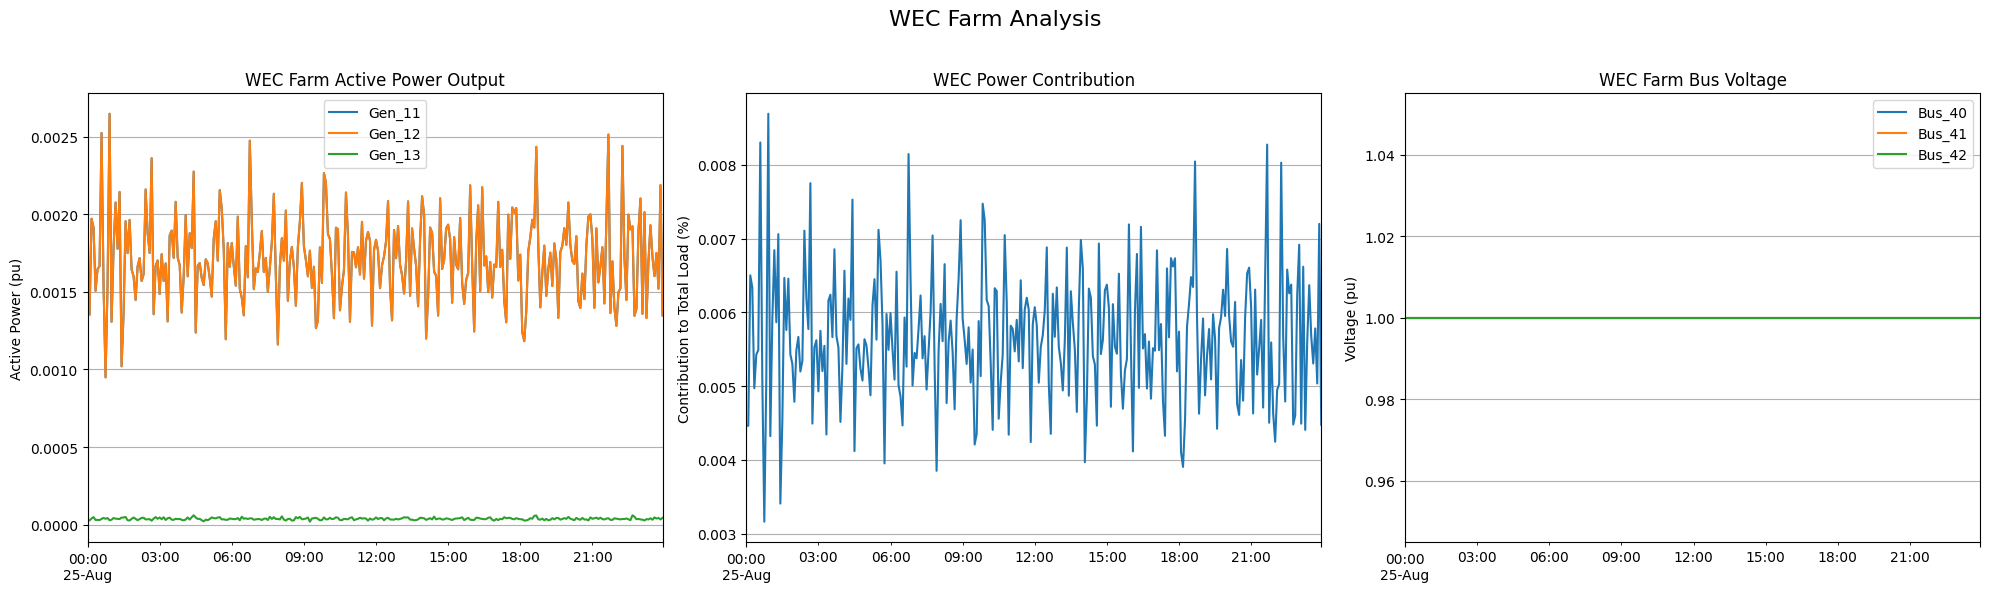

In [10]:
plot.wec_analysis()